# Assignment 2

## Instructions
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

In [ ]:
# Vladimir Zelenokor
# keksikoz.hs@yandex.ru

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanAbsoluteError

In [7]:
# Openning goodle drive to get the triple_mnist.zip from it
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
# Data is the dataset of task 1
data = pd.read_csv('Task 1.csv')

In [8]:
# Unziping the triple_mnist.zip folder
!unzip /content/drive/MyDrive/triple_mnist.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: triple_mnist/val/686/54_686.png  
 extracting: triple_mnist/val/686/55_686.png  
 extracting: triple_mnist/val/686/56_686.png  
 extracting: triple_mnist/val/686/57_686.png  
 extracting: triple_mnist/val/686/58_686.png  
 extracting: triple_mnist/val/686/59_686.png  
 extracting: triple_mnist/val/686/5_686.png  
 extracting: triple_mnist/val/686/60_686.png  
 extracting: triple_mnist/val/686/61_686.png  
 extracting: triple_mnist/val/686/62_686.png  
 extracting: triple_mnist/val/686/63_686.png  
 extracting: triple_mnist/val/686/64_686.png  
 extracting: triple_mnist/val/686/65_686.png  
 extracting: triple_mnist/val/686/66_686.png  
 extracting: triple_mnist/val/686/67_686.png  
 extracting: triple_mnist/val/686/68_686.png  
 extracting: triple_mnist/val/686/69_686.png  
 extracting: triple_mnist/val/686/6_686.png  
 extracting: triple_mnist/val/686/70_686.png  
 extracting: triple_mnist/val/686/71_686.

In [11]:
# I used ordinal encoder because I noticed it gave the same result of One hot and it has less number of columns
from sklearn.preprocessing import OrdinalEncoder
def oe_new_features(df, features_name, encoder): # The function for ordinal encoding
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=features_name)
    new_df = df.copy()
    new_df.drop(features_name, axis=1, inplace=True)
    new_df = pd.concat([new_df, new_cols], axis=1)
    return new_df
encoder = OrdinalEncoder()
f_name = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
encoder.fit(data[f_name])
data = oe_new_features(data, f_name, encoder)
print(data.shape)

(1000, 8)


In [12]:
from sklearn.model_selection import train_test_split
# Making the train and test data

X_ANN= data[['gender','race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y_ANN= data[['math score', 'reading score', 'writing score']]

X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_ANN,y_ANN,test_size=0.2)

7/7 [==============================] - 0s 2ms/step
the result of the model is: [11.526850700378418, 0.6050000190734863]


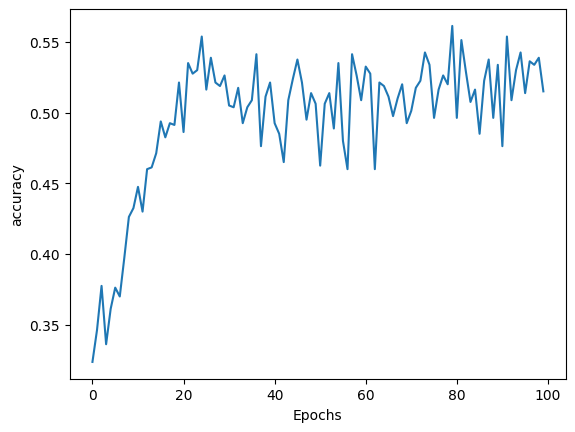

In [13]:
# Mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
mae = MeanAbsoluteError()
# Define the model
def get_model(n_inputs, n_outputs, loss1):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(300,activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(100,activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(n_outputs))
	model.compile(loss=loss1, optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
	return model
model_ANN = get_model(5,3,mae)

# Fit model
history = model_ANN.fit(X_train_ANN, y_train_ANN, verbose=0, epochs=100)
# Evaluate model on test set
result = model_ANN.evaluate(X_test_ANN, y_test_ANN, verbose=0)
y_pred = model_ANN.predict(X_test_ANN)
print(f"the result of the model is: {result}")
def plot_result(history, key):
  plt.plot(history.history[key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.show()

plot_result(history, 'accuracy')

### Questions
1. What preprocessing techniques did you use? Why?
    - I used Ordinal encoder because I noticed it gave the same result of One-Hot and it has less number of columns
2. Describe the fine-tuning process and how you reached your model architecture.
    - I made fine tuning by my self and I did not put it here because it takes more than 30 minutes and at the end it gave bad result:
    Due to the fact that Keras Tuner asks us to pass a function that identifies the hyperparameters that it must tune while simultaneously creating the model.
    I used tuner Random search because one way to find the optimal parameters is to try every possible combinations of the available parameters [Grid Search], but the number of combinations would increase exponentially as the number of hyperparameters increases. Trying all the combinations one by one takes longer to explore the hyperparameter space. Random search helps to explore more hyperparameter space in less time as compared to Grid Search.
    It takes model-building function as a parameter.
    max_trail:This figure represents the total number of hyperparameter combinations that will be tested or used to determine which one works best.
    execution_per_trail:It informs the tuner how many times a particular combination must be used in order to evaluate how well it performs against the target.
    directory:helps us to avoid the error in rerun

After that Start tuning using tuner.search()
Finally Get optimal hyperparameters and models from the tuner

The accuracy of the new model was 0.2 so I tried to build a model by my self (Randomly) and I get Accuracy 0.6 so I kept the model with the better accuracy and as the fine tunning by keras did not show good result I deleted it.

# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as image
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
import numpy as np

In [16]:
# This function is to split one image to 3 images each one has one digit
# I used simple algorithm after I noticed that the image has a lot of zero pixels
# I notices also that the image can always be splited in width
# I created and I idea which is there is always a comlumn with fully zeros pixels between the digits
# So I started check on every comlumn if it is full with zeros or not and if this column is between the digits or not
# And I took the index of any column that is between the digits and has full zero pixels
# Then I got two indexes and I split the image to three smaller images by the indexes that I has
# The height of the image still the same but I has to make the width of images that I got equal to the original image
# So I used padding
# The funtuntion return three images each of them has one digit
def convert_one_to_three_images(image_matrix):
  # Fold and pre and check only variables helped me to find the indexes
  # Index1 is the index of the comlumn that split the first digit from the second
  # Index2 is the index of the comlumn that split the second digit from the third
  fold = 0
  pre = 0
  idx1 = -1
  idx2 = -1
  for i in range(84):
    check = 0
    for j in range(84):     # This for loop to find if the column has number greater of zero or not
      if image_matrix[j][i] != 0:
        check=1
        break
    if check == 0:
      if fold == 0:
        continue            # Here it mean that we still before the first digit
      elif fold == 1:
        idx1 = i            # Here it mean that we finished from the first digit and arrived to the first split
        fold += 1
        pre=0
      elif fold == 2:
        continue            # Her it mean that we are between the first and second digit but we already got index1
      elif fold == 3:
        idx2 = i            # Here it mean that we finished from the second digit and arrived to the third split
        break
    else:
      if pre == 0:          # Here we are in digit zone
        fold += 1
        pre = 1
  # After getting the indexs I split the main images to three smaller images
  image1 = image_matrix[0:84,0:idx1]
  image2 = image_matrix[0:84,idx1+1:idx2]
  image3 = image_matrix[0:84,idx2+1:84]
  # Now I do padding to the images
  image1 = np.pad(image1, [(0, 0), (0, 84-image1.shape[1])], mode='constant')
  image2 = np.pad(image2, [(0, 0), (0, 84-image2.shape[1])], mode='constant')
  image3 = np.pad(image3, [(0, 0), (0, 84-image3.shape[1])], mode='constant')
  return image1, image2, image3

In [17]:
# Load the data
import os
import cv2

train_data_directory = "/content/triple_mnist/train"
test_dir = "/content/triple_mnist/test"
val_dir = "/content/triple_mnist/val"
labels = []
train_data_list = []
test_data_list = []
val_data_list = []
for i in range (0,10):
    for j in range (0,10):
        for k in range (0,10):
            labels.append("{}{}{}".format(i,j,k))

def split(label):
    num = []
    for i in label:
        num.append(i)
    number1 = num[0]
    number2 = num[1]
    number3 = num[2]
    return number1, number2, number3
def create_train_DATA():
    for label in labels:
        path = os.path.join(train_data_directory, label)
        try:
            for img in os.listdir(path):
                try:
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    image1 , image2, image3 = convert_one_to_three_images(img_arr)
                    number1 ,number2 , number3 = split(str(label))
                    train_data_list.append([image1,int(number1)])
                    train_data_list.append([image2,int(number2)])
                    train_data_list.append([image3,int(number3)])
                except Exception as e:
                    pass
        except Exception as e:
                    pass

def create_test_DATA():
    for label in labels:
        path = os.path.join(test_dir, label)
        try:
            for img in os.listdir(path):
                try:
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    image1 , image2, image3 = convert_one_to_three_images(img_arr)
                    number1 ,number2 , number3 = split(str(label))
                    test_data_list.append([image1,int(number1)])
                    test_data_list.append([image2,int(number2)])
                    test_data_list.append([image3,int(number3)])
                except Exception as e:
                    pass
        except Exception as e:
                    pass

def create_val_DATA():
    for label in labels:
        path = os.path.join(val_dir, label)
        try:
            for img in os.listdir(path):
                try:
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    image1 , image2, image3 = convert_one_to_three_images(img_arr)
                    number1 ,number2 , number3 = split(str(label))
                    val_data_list.append([image1,int(number1)])
                    val_data_list.append([image2,int(number2)])
                    val_data_list.append([image3,int(number3)])
                except Exception as e:
                    pass
        except Exception as e:
                    pass

create_train_DATA()
create_test_DATA()
create_val_DATA()

In [18]:
# Model / data parameters
number_classes = 10
input_inshape = (84, 84, 1)

In [19]:
import random
random.shuffle(train_data_list)
x_train = []
y_train = []
for X, y in train_data_list:
    x_train.append(X)
    y_train.append(y)

x_test = []
y_test = []
for X, y in test_data_list:
    x_test.append(X)
    y_test.append(y)

x_val = []
y_val = []
for X, y in val_data_list:
    x_val.append(X)
    y_val.append(y)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
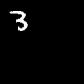

In [20]:
x_train[0]

In [21]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_train.shape

(192000, 84, 84)

In [22]:
print(y_train.shape)

(192000,)


In [23]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, number_classes)
y_test = keras.utils.to_categorical(y_test, number_classes)
y_val = keras.utils.to_categorical(y_val, number_classes)

In [24]:
# ANN for minist data
model_ANN2 = get_model(7056, 10, "categorical_crossentropy")
history_ANN2 = model_ANN2.fit(x_train.reshape(-1,7056), y_train, verbose=1, epochs=3)


Epoch 1/3
6000/6000 [==============================] - 25s 4ms/step - loss: 8.1565 - accuracy: 0.0989
Epoch 2/3
6000/6000 [==============================] - 20s 3ms/step - loss: 8.0521 - accuracy: 0.1004
Epoch 3/3
6000/6000 [==============================] - 21s 4ms/step - loss: 8.0483 - accuracy: 0.1064


In [25]:
score = model_ANN2.evaluate(x_test.reshape(-1,7056), y_test, verbose=1)
print("Test loss of ANN with minist dataset:", score[0])
print("Test accuracy of ANN with minist dataset:", score[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 8.1931 - accuracy: 0.0833
Test loss of ANN with minist dataset: 8.19308853149414
Test accuracy of ANN with minist dataset: 0.0833333358168602


In [26]:
# Implement the CNN model with the given architecture above
model = keras.Sequential(
    [
        keras.Input(shape=input_inshape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(number_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 41, 41, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val))


Epoch 1/5
1500/1500 [==============================] - 34s 20ms/step - loss: 0.5694 - accuracy: 0.8415 - val_loss: 0.2880 - val_accuracy: 0.9204
Epoch 2/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2021 - accuracy: 0.9389 - val_loss: 0.2317 - val_accuracy: 0.9389
Epoch 3/5
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1549 - accuracy: 0.9527 - val_loss: 0.2174 - val_accuracy: 0.9442
Epoch 4/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1295 - accuracy: 0.9595 - val_loss: 0.2437 - val_accuracy: 0.9386
Epoch 5/5
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1152 - accuracy: 0.9633 - val_loss: 0.2285 - val_accuracy: 0.9473


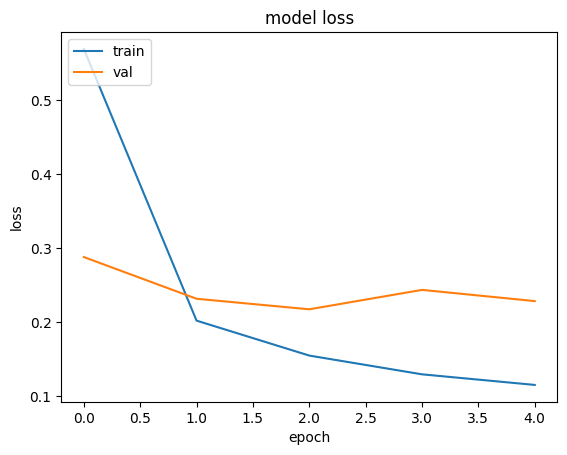

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

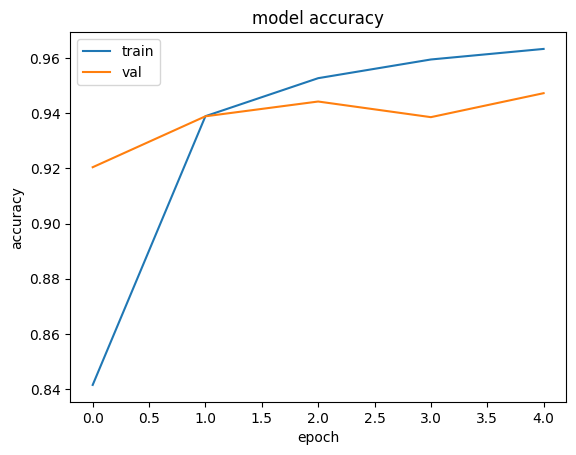

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("OMG Test accuracy:", score[1])

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2132 - accuracy: 0.9487
Test loss: 0.21324646472930908
OMG Test accuracy: 0.9487333297729492


### Questions
1. What preprocessing techniques did you use? Why?
    -  I made a function to split one image to 3 images each one has one digit, I used simple (prefix sum without summing) algorithm after I noticed that the image has a lot of zero pixels, I notices also that the image can always be splited in width, so i created and I idea which is there is always a comlumn with fully zeros pixels between the digits,so I started check on every comlumn if it is full with zeros or not and if this column is between the digits or not, and I took the index of any column that is between the digits and has full zero pixels. finally I got two indexes and I split the image to three smaller images by the indexes that I has. the height of the image still the same but I have to make the width of images equal to the original image so I used padding the funtuntion return three images each of them has one digit.

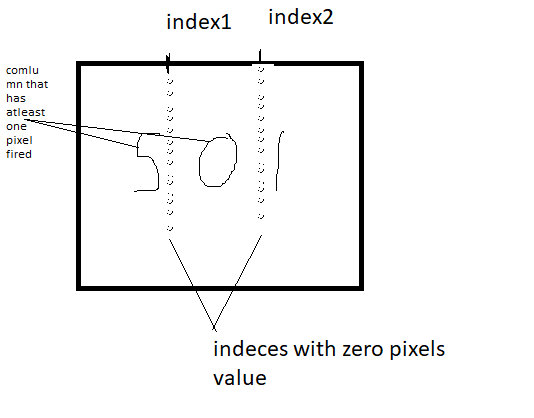  
2. What data augmentation techniques did you use?
    - I used convert to gray scale and padding technques after splitting the images
3. Describe the fine-tuning process and how you reached your final CNN model.
    - With fine-tuning, I first changed the last layer to match the output in our dataset. But besides, we also retrain the layers of the network that we want.
    and every thing else as finetuning the last task

# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [32]:
# I unziped the svhn.zip
!unzip /content/drive/MyDrive/svhn.zip

Archive:  /content/drive/MyDrive/svhn.zip
   creating: svhn/
 extracting: svhn/111.png            
 extracting: svhn/113.png            
 extracting: svhn/114.png            
 extracting: svhn/116.png            
  inflating: svhn/120.png            
 extracting: svhn/124.png            
 extracting: svhn/128.png            
  inflating: svhn/129.png            
  inflating: svhn/130.png            
 extracting: svhn/132.png            
 extracting: svhn/136.png            
 extracting: svhn/138.png            
 extracting: svhn/140.png            
 extracting: svhn/144.png            
 extracting: svhn/148.png            
 extracting: svhn/150.png            
 extracting: svhn/151.png            
 extracting: svhn/153.png            
 extracting: svhn/157.png            
  inflating: svhn/158.png            
 extracting: svhn/159.png            
 extracting: svhn/164.png            
 extracting: svhn/165.png            
 extracting: svhn/166.png            
 extracting: svhn/171.png  

In [33]:
test_data_dir_svhn = "/content/svhn"
test_data_svhn = []
def create_test_for_svhn():
  for img in os.listdir(test_data_dir_svhn):
          img_arr = cv2.imread(os.path.join(test_data_dir_svhn, img), cv2.IMREAD_GRAYSCALE)
          img_arr.resize(84,84)
          image1 , image2, image3 = convert_one_to_three_images(img_arr)
          number1 ,number2 , number3 = split(str(img[0:4]))
          test_data_svhn.append([image1,int(number1)])
          test_data_svhn.append([image2,int(number2)])
          test_data_svhn.append([image3,int(number3)])
create_test_for_svhn()
x_test_svhn = []
y_test_svhn = []
for features, label in test_data_svhn:
    x_test_svhn.append(features)
    y_test_svhn.append(label)
x_test_svhn = np.array(x_test_svhn)/255.0
y_test_svhn = np.array(y_test_svhn)
y_test_svhn = keras.utils.to_categorical(y_test_svhn, number_classes)
score = model.evaluate(x_test_svhn, y_test_svhn, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(x_test_svhn.shape)

9/9 [==============================] - 0s 24ms/step - loss: 2.3388 - accuracy: 0.1341
Test loss: 2.3387608528137207
Test accuracy: 0.13405796885490417
(276, 84, 84)


### Questions
1. How did your model perform? Why is it better/worse?
    - it perform very bad comparing to the previes model and that is because I did not split the images to three part effecianlty
2. What is domain gap in the context of ML?
    - *Deep domain adaptation enables us to move a specific DNN's knowledge from a source task to a new, connected target task. It has been used well in projects like picture classification and style transfer. In some ways, deep domain adaptation enables us to reduce the quantity of training data needed for a specific new computer vision task, bringing us closer to human-level performance. Therefore, I believe that advancement in this area will be essential to the field of computer vision as a whole, and I hope that it will eventually enable us to reuse knowledge across visual tasks in an efficient and straightforward manner.*
3. Suggest two ways through which the problem of domain gap can be tackled.
    - *Reducing Domain Gap by Reducing Style Bias*

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')
loans = pd.read_csv('loan_data.csv')
loans.info()
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)
final_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
X = final_data.drop('credit.policy', axis = 1)
y = final_data['credit.policy']
# Splitting the data to treain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state= 101)


In [36]:
import graphviz
from sklearn import tree
features = X.columns.tolist()
target = 'credit.policy'
def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                       feature_names=features,
                       class_names=target,
                       filled=True, rounded=True,
                       special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)
evaluate_model(dtree)

Train Accuracy : 1.0
Train Confusion Matrix:
[[1501    0]
 [   0 6161]]
--------------------------------------------------
Test Accuracy : 0.9926931106471816
Test Confusion Matrix:
[[ 360    7]
 [   7 1542]]


In [38]:
from sklearn.metrics import accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [40]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)
evaluate_model(dt_depth)

Train Accuracy : 0.9697206995562516
Train Confusion Matrix:
[[1270  231]
 [   1 6160]]
--------------------------------------------------
Test Accuracy : 0.9686847599164927
Test Confusion Matrix:
[[ 308   59]
 [   1 1548]]


In [41]:
dt_min_split = DecisionTreeClassifier(min_samples_split=30)
dt_min_split.fit(X_train, y_train)
evaluate_model(dt_min_split)

Train Accuracy : 0.9947794309579744
Train Confusion Matrix:
[[1478   23]
 [  17 6144]]
--------------------------------------------------
Test Accuracy : 0.9926931106471816
Test Confusion Matrix:
[[ 361    6]
 [   8 1541]]


In [42]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)
evaluate_model(dt_min_leaf)

Train Accuracy : 0.9895588619159489
Train Confusion Matrix:
[[1450   51]
 [  29 6132]]
--------------------------------------------------
Test Accuracy : 0.9874739039665971
Test Confusion Matrix:
[[ 353   14]
 [  10 1539]]


In [43]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.9898198903680501
Train Confusion Matrix:
[[1447   54]
 [  24 6137]]
--------------------------------------------------
Test Accuracy : 0.9848643006263048
Test Confusion Matrix:
[[ 347   20]
 [   9 1540]]


In [44]:
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019115,0.001122,0.003262,0.000284,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.947808,0.948852,0.956658,0.949869,0.950797,0.003462,41
1,0.017892,0.001323,0.004008,0.001383,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.947808,0.948852,0.956658,0.949869,0.950797,0.003462,41
2,0.023491,0.008950,0.003032,0.000317,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.947808,0.948852,0.956658,0.949869,0.950797,0.003462,41
3,0.016652,0.000398,0.002875,0.000188,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.947808,0.948852,0.956658,0.949869,0.950797,0.003462,41
4,0.016145,0.000513,0.002728,0.000109,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.947808,0.948852,0.956658,0.949869,0.950797,0.003462,41


In [45]:
print(grid_search.best_estimator_)
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)
print(classification_report(y_test, dt_best.predict(X_test)))

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)
Train Accuracy : 0.9960845732184808
Train Confusion Matrix:
[[1485   16]
 [  14 6147]]
--------------------------------------------------
Test Accuracy : 0.9926931106471816
Test Confusion Matrix:
[[ 360    7]
 [   7 1542]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       1.00      1.00      1.00      1549

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



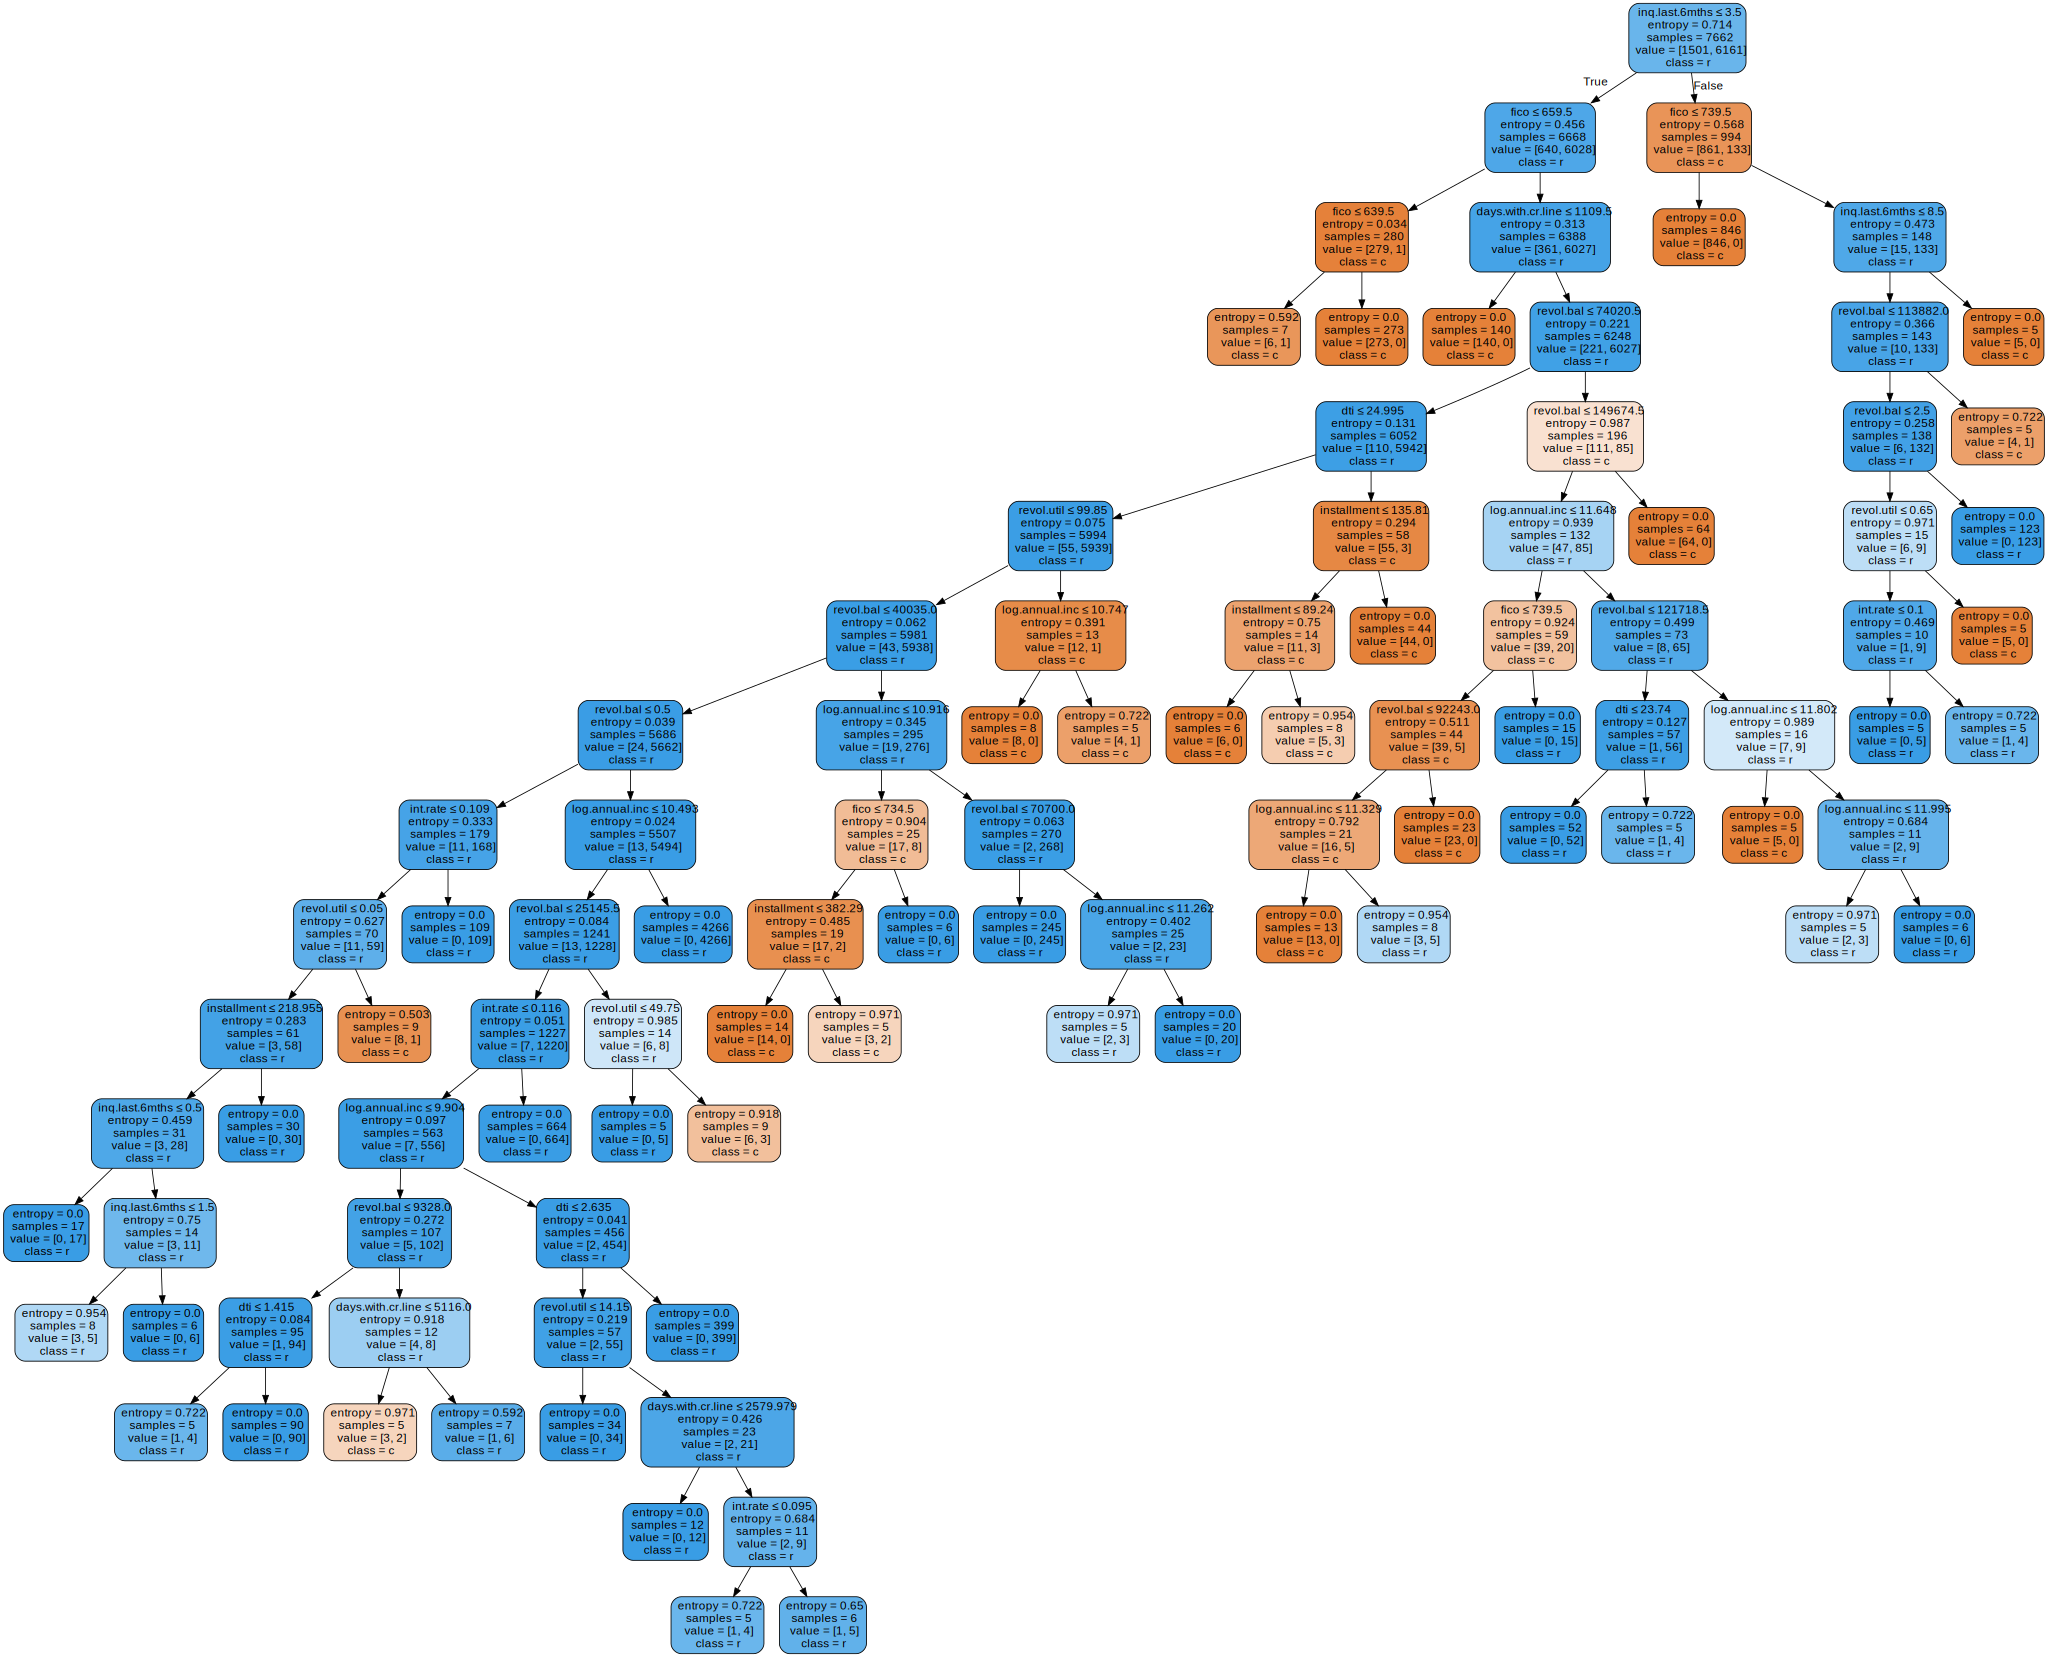

In [46]:
graph = plot_tree(dt_best)
graph

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 300)
rforest.fit(X_train, y_train)
y_predict = rforest.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.988517745302714
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       367
           1       0.99      1.00      0.99      1549

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916

[[ 351   16]
 [   6 1543]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid  = {
    'criterion': ['entropy','gini'],
    'max_depth': [None,5,6,7,15],
    'max_features': ['log2','sqrt','auto'],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [2, 4 , 6, 10],
    'n_estimators': [10, 20, 30]
}
grid_searchrf = RandomizedSearchCV(estimator=rf,
                           param_distributions=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring = "accuracy")
grid_searchrf.fit(X_train, y_train)
score_df_rf = pd.DataFrame(grid_searchrf.cv_results_)
score_df_rf.head()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.715466,0.038860,0.021481,0.006242,30,10,5,auto,15,entropy,"{'n_estimators': 30, 'min_samples_split': 10, ...",0.981989,0.989037,0.986296,0.985774,0.002901,3
1,0.616278,0.071976,0.023722,0.009764,30,6,4,log2,None,gini,"{'n_estimators': 30, 'min_samples_split': 6, '...",0.982381,0.988645,0.988645,0.986557,0.002953,1
2,0.419882,0.025599,0.017343,0.005727,20,2,6,log2,None,gini,"{'n_estimators': 20, 'min_samples_split': 2, '...",0.981597,0.988645,0.983947,0.984730,0.002930,4
3,0.386578,0.078319,0.020728,0.009686,20,4,4,sqrt,None,gini,"{'n_estimators': 20, 'min_samples_split': 4, '...",0.981989,0.990211,0.987471,0.986557,0.003418,1
4,0.366117,0.040056,0.017374,0.005411,30,2,5,sqrt,7,entropy,"{'n_estimators': 30, 'min_samples_split': 2, '...",0.978074,0.988645,0.981989,0.982903,0.004364,7


In [48]:
print(grid_searchrf.best_estimator_)
rf_best = grid_search.best_estimator_
evaluate_model(dt_best)
print(classification_report(y_test, dt_best.predict(X_test)))

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=30)
Train Accuracy : 0.9960845732184808
Train Confusion Matrix:
[[1485   16]
 [  14 6147]]
--------------------------------------------------
Test Accuracy : 0.9926931106471816
Test Confusion Matrix:
[[ 360    7]
 [   7 1542]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       1.00      1.00      1.00      1549

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



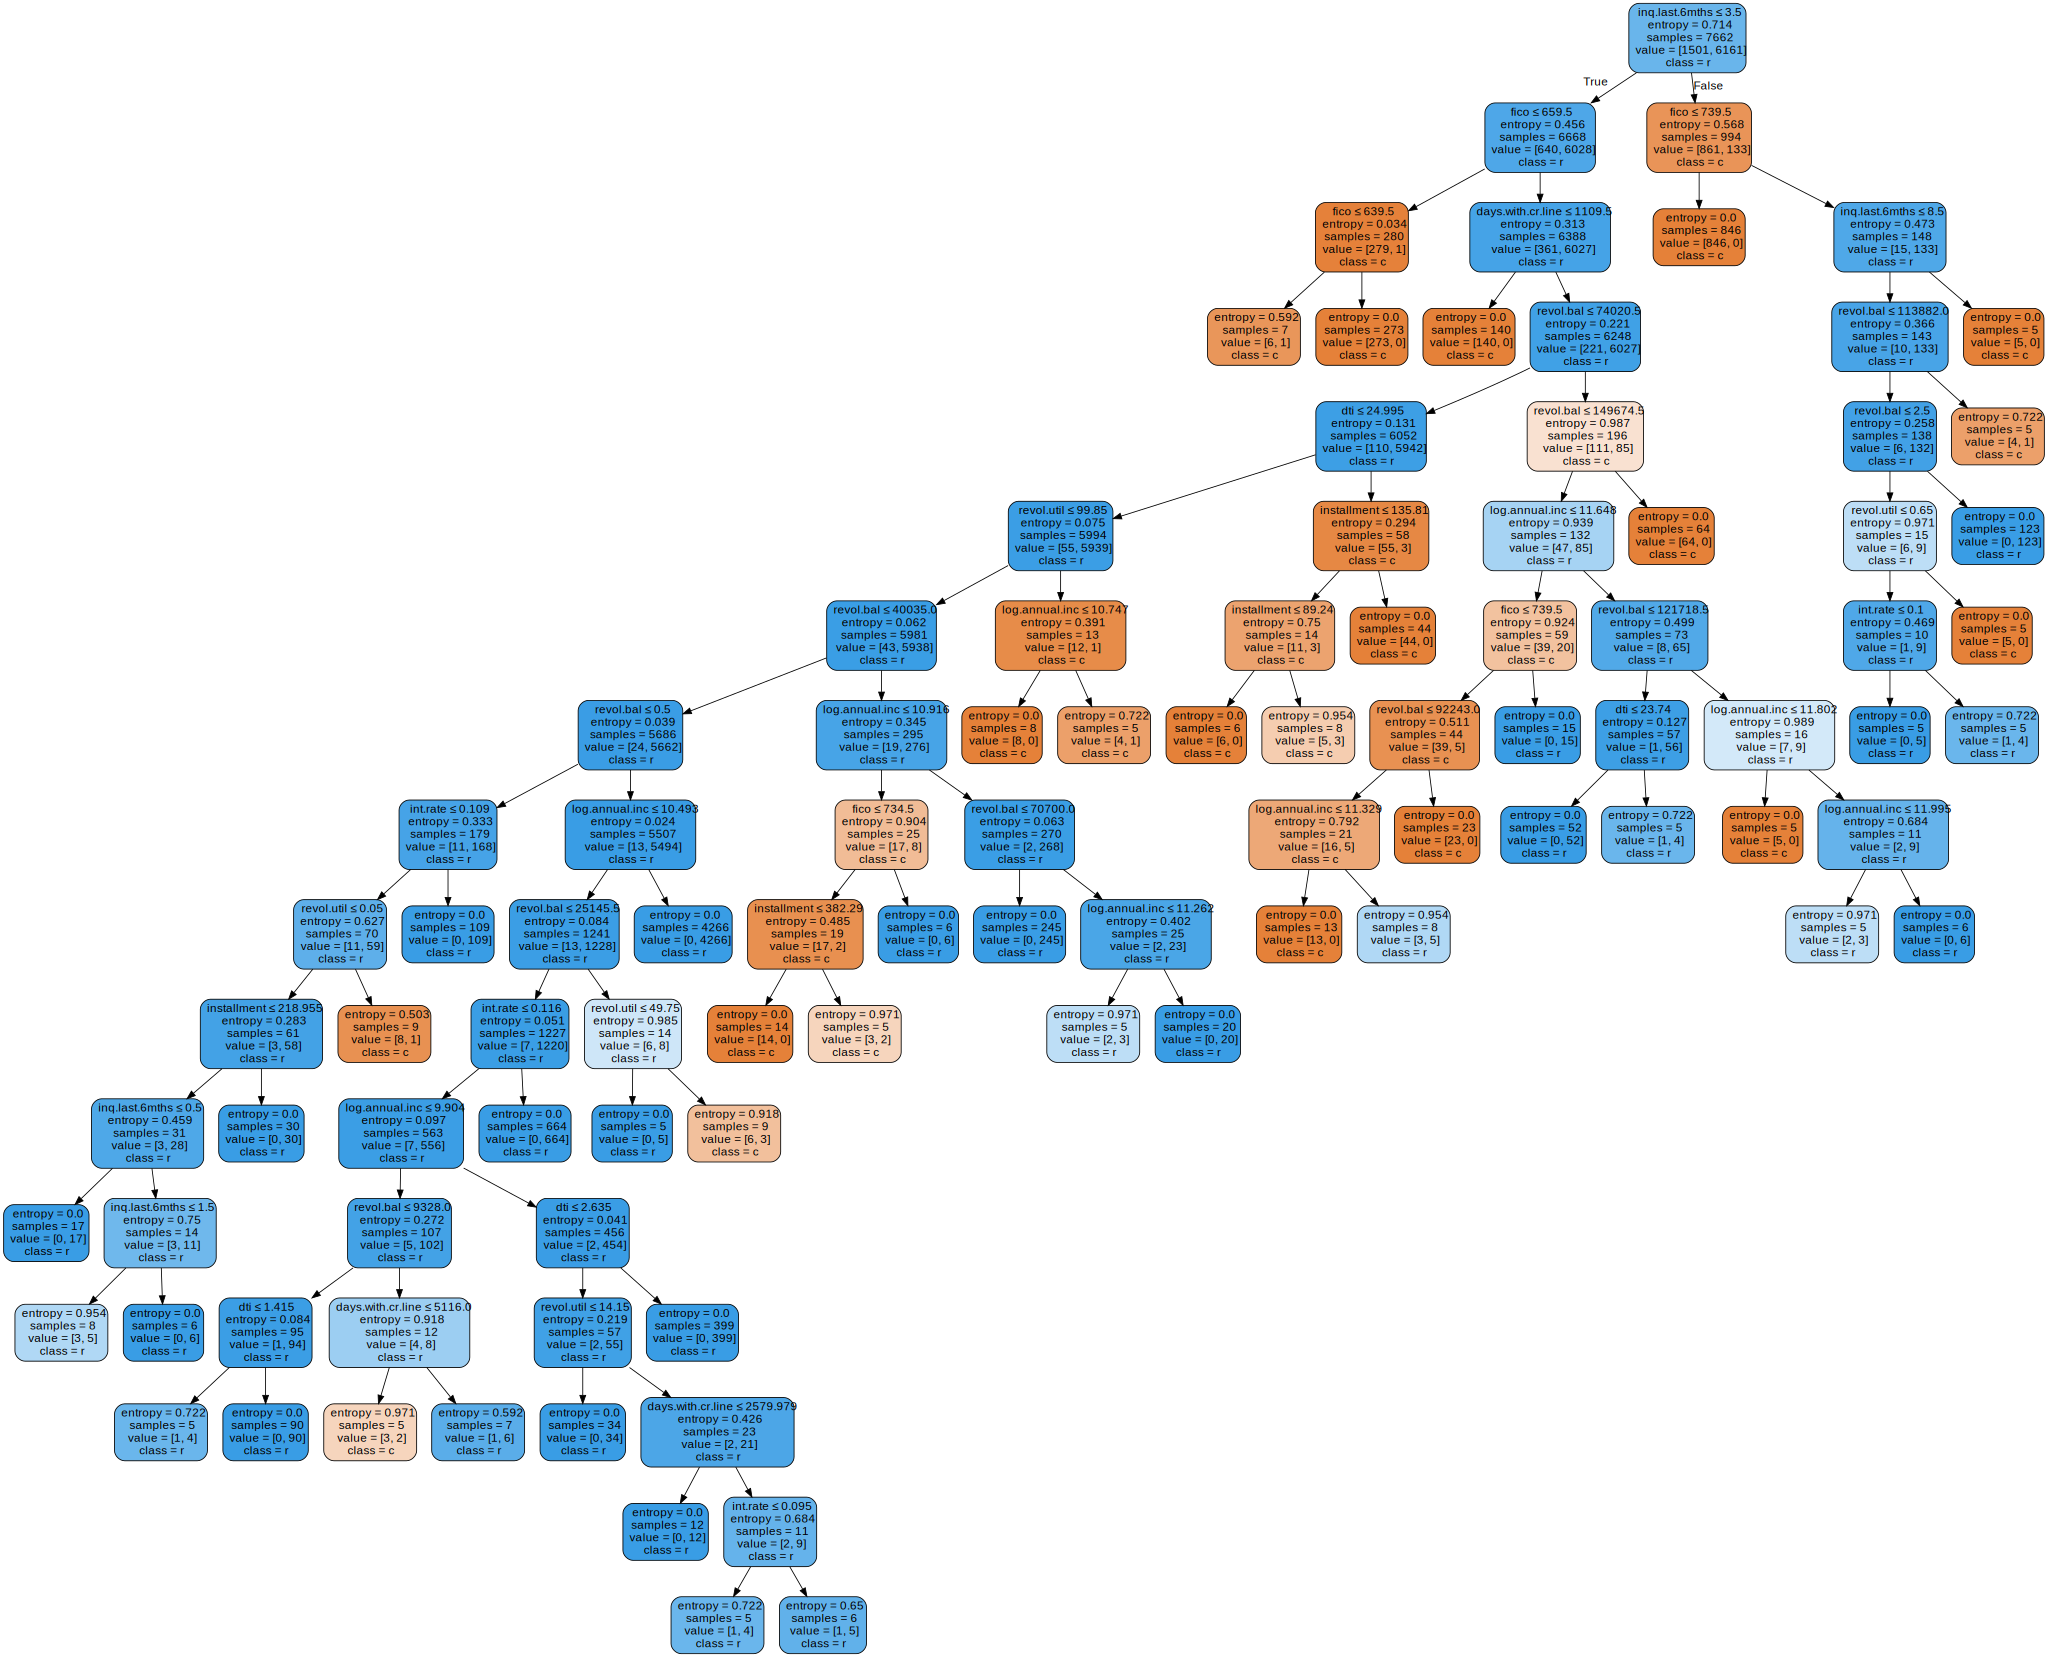

In [49]:
graph = plot_tree(rf_best)
graph

### Questions
1. How did the DT compare to the RF in performance? Why?
    - *In comparimg between ACC I found that DT is preformance better than RF because it is faster because Rf is multible DT*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *The best max depth for DT is 20 and the best max depth for RF is 15
    The model's flexibility is determined by the tree depth. Complexer functions can fit in a deeper tree. The performance on the training set should therefore improve as tree depth is increased. However, greater flexibility also makes it easier to overfit the data, and if depth is increased too much, generalization performance may suffer (i.e. test set performance may decrease). Increased depth reduces bias at the expense of increasing variance, to put it another way. By averaging over several trees, random forests can reduce this rise in variance, but they are still vulnerable to overfitting. Tuning the tree depth to create an appropriate balance between bias and variance is usually necessary to obtain the optimum generalization performance (e.g. by optimizing the out-of-bag error).*
3. What is ensemble learning? What are its pros and cons?
    - *When using ensemble methods, more learning algorithms are used for prediction than would be possible with just one of the individual learning algorithms.*
    - One disadvantage of ensemble learning is that the results of the ensembled model are difficult to predict and understand. As a result, it is challenging to market the ensemble concept and obtain insightful commercial data.

 Assembling is a difficult skill to master, and any poor decision might result in a model with lower prediction accuracy than an individual model.

 Costs associated with assembly include both time and physical space. Therefore, ensembling can increase ROI.*
advantages of ensemble methods
 Ensemble approaches outperform individual models in terms of predicted accuracy.

 With ensemble approaches, bias and variance can be decreased, and the model is typically neither underfit nor overfit.*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *A meta-estimator called an AdaBoost classifier first fits a classifier on the original dataset, and then it fits additional copies of the classifier on the same dataset with the weights of instances that were incorrectly classified being changed so that later classifiers would concentrate more on challenging cases.
Rf is classified as a gradient booster. It is predicated on the hunch that when previous models are combined with the best possible next model, the overall prediction error is minimized. Setting the desired results for this subsequent model in order to reduce error is the key concept.*
  -*The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modeled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample)
  DATA Agregation: For example, raw data can be aggregated over a given time period to provide statistics such as average, minimum, maximum, sum, and count. After the data is aggregated and written to a view or report, you can analyze the aggregated data to gain insights about particular resources or resource groups.*